# Fluxonium Design with 6 single qubits NEW EVEN SIMPLER look

## GDS file

### Preparations

In [1]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround

In [38]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '2mm'
design._chips['main']['size']['size_y'] = '1mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True

gui = MetalGUI(design)

In [39]:
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_chain0'



# Q JJ2 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-0.5mm', pos_y = '0.0mm',
               pocket_width= '500um',
        gds_cell_name=gds_cell_name_jj,   
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ2 = FluxoniumPocket(design,'QJJ2', options = dict(
        **options))



# Q Array2 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '0.5mm', pos_y = '0.0mm',
               pocket_width= '500um',
        gds_cell_inductor=gds_cell_name_inductor ,   
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                        fbl_sep='150um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
            cl_sep ='-10um',
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
            pad_width = '300um', pad_height = '80um',
            pad_sep='60um', 
              ) )
               
qArr2 = FluxoniumPocket(design,'QArr2', options = dict(
        **options))



gui.rebuild()

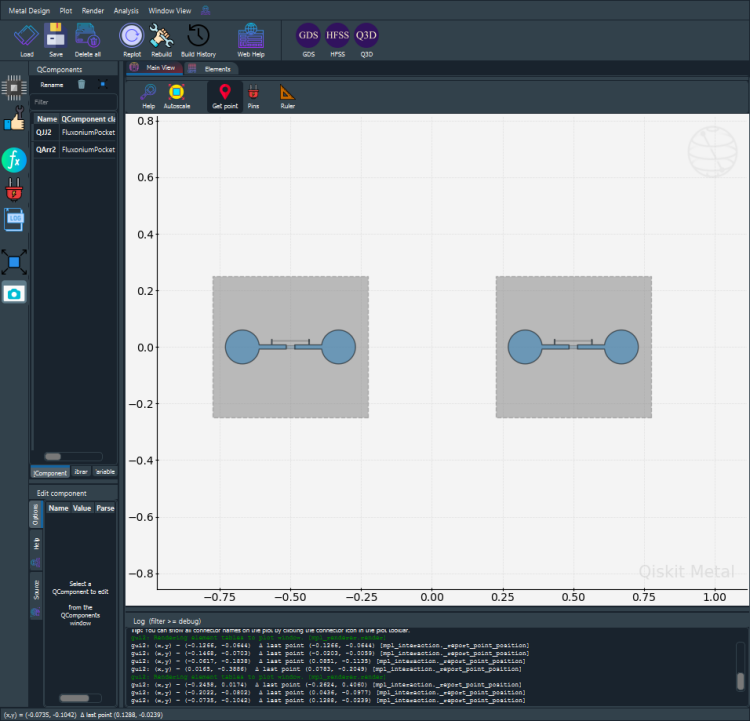

In [32]:
#Save screenshot as a .png formatted file.
gui.screenshot()

In [33]:
qJJ1 #print Q1 information


name:    QJJ1
class:   FluxoniumPocket       
options: 
  'pos_x'             : '-0.5mm',                     
  'pos_y'             : '0.2mm',                      
  'orientation'       : 90,                           
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '10um',                       
  'inductor_orientation': '-1',                         
  'pad_width'         : '15um',                       
  'pad_height'        : '110um',                      
  'pad_radius'        : '60um',                       
  'l_width'           : '1um',                        
  'array_length'      : '130um',                      
  'l_arm_width'       : '2um',                        
  'l_arm_length'      : '25um',                       
  'l_inductance'      : '200nH',                      
  'l_ind_

## GDS

In [40]:
fluxonium_gds = design.renderers.gds
fluxonium_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'fabricate': 'False',
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': '../resources/Fake_Junctions.GDS',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '200um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '300um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: True}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

In [41]:
fluxonium_gds.options['path_filename'] = 'JJ_Dose_test_2by1mm.gds'

In [42]:
fluxonium_gds.options['fabricate'] = True

In [43]:
fluxonium_gds.export_to_gds('JJ_dose_test.gds')

01:24PM 24s WARNING [_import_junctions_to_one_cell]: From the "junction" table, the cell named "gds_cell_inductor"",  is not in file: JJ_Dose_test_2by1mm.gds. The cell was not used.
01:24PM 24s WARNING [_import_junctions_to_one_cell]: From the "junction" table, the cell named "jj_chain0"",  is not in file: JJ_Dose_test_2by1mm.gds. The cell was not used.
01:24PM 24s WARNING [_import_junctions_to_one_cell]: From the "junction" table, the cell named "my_other_junction"",  is not in file: JJ_Dose_test_2by1mm.gds. The cell was not used.


1

In [31]:
# View every entry in junction table.
design.qgeometry.tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,hfss_resistance,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name
0,16,inductor,"LINESTRING (-2.13500 -2.25200, -2.26500 -2.25200)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_chain0
1,16,rect_jj,"LINESTRING (-2.18500 -2.30000, -2.21500 -2.30000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
2,17,inductor,"LINESTRING (2.26500 -3.15200, 2.13500 -3.15200)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_chain0
3,17,rect_jj,"LINESTRING (2.21500 -3.20000, 2.18500 -3.20000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
4,18,inductor,"LINESTRING (-2.13500 0.04800, -2.26500 0.04800)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_chain0
5,18,rect_jj,"LINESTRING (-2.18500 0.00000, -2.21500 0.00000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
6,19,inductor,"LINESTRING (2.46500 -0.75200, 2.33500 -0.75200)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_chain0
7,19,rect_jj,"LINESTRING (2.41500 -0.80000, 2.38500 -0.80000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
8,20,inductor,"LINESTRING (-2.43500 3.04800, -2.56500 3.04800)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_chain0
9,20,rect_jj,"LINESTRING (-2.48500 3.00000, -2.51500 3.00000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0


In [32]:
fluxonium_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'fabricate': True,
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': 'Fluxonium_JJandArray9by9.gds',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '200um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '300um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: True}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

In [33]:
gui.main_window.close()

True